In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# loading the csv data to a Pandas DataFrame
from google.colab import files
uploaded=files.upload()

Saving gld_price_data.csv to gld_price_data (1).csv


In [ ]:
gold_data=pd.read_csv('gld_price_data.csv')

In [ ]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = gold_data.drop('Date', axis=1).corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

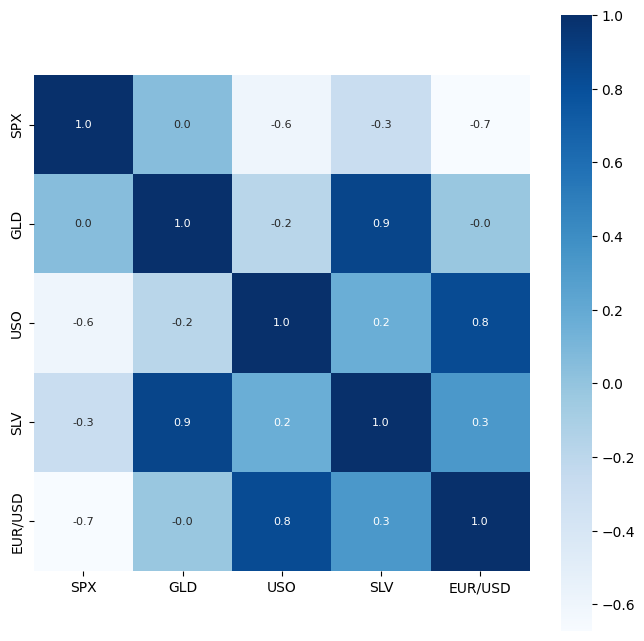

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-27-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

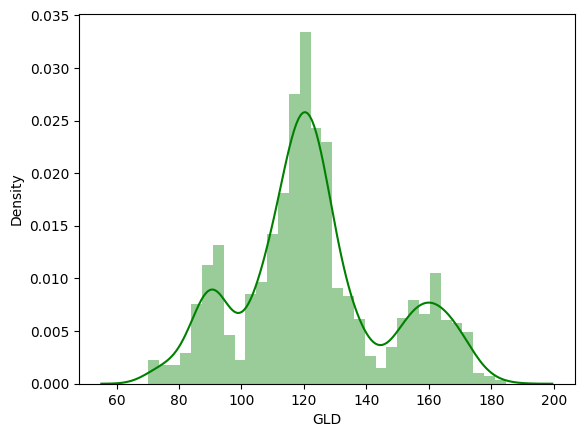

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.52739948  81.96859992 115.92579999 127.67770037 120.52150141
 154.75069716 150.52539863 126.06150049 117.36779877 126.07420042
 116.50780112 171.27440062 141.70509819 167.69769863 115.27690013
 117.57030045 140.04110278 169.92470083 159.44150248 160.09799962
 155.16829992 125.30330016 175.11029995 157.26220338 125.14300049
  93.87619981  78.15959966 120.73920007 119.17189984 167.4958995
  88.18180016 124.93339972  91.23160104 117.6344003  121.0548995
 136.15740118 115.60360126 115.23550085 149.0184999  107.05770104
 104.32980241  87.30879802 126.52850054 117.95019969 152.82669954
 119.73000011 108.38510011 107.98139789  93.13470033 127.20499778
  74.95220047 113.67359922 121.2859     111.26109951 118.85279887
 120.83389953 157.96980067 168.43900102 147.30649671  85.51019838
  94.34890038  86.72109903  90.50320001 118.96040057 126.41560071
 127.48619993 170.2777998  122.35099928 117.25329885  99.0845002
 168.37300144 142.88279773 132.0231027  121.04110216 121.25719916
 119.66420051

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9890562245490496


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

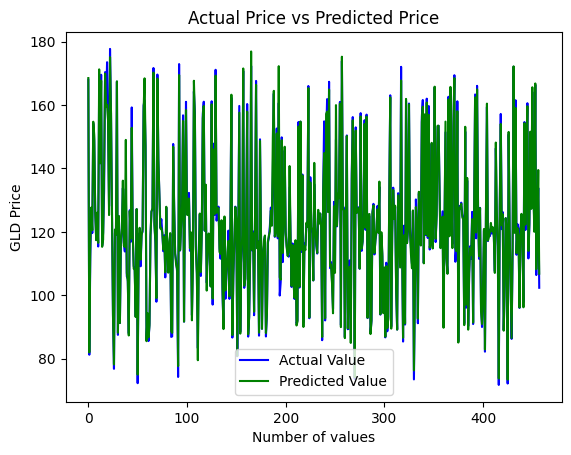

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted Gold Prices')

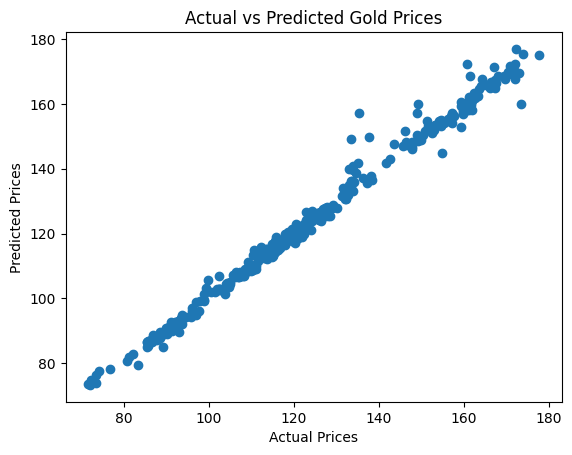

In [ ]:
# Actual vs. Predicted Scatter Plot

plt.scatter(Y_test, test_data_prediction) # Changed y_test to Y_test and predictions to test_data_prediction
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Gold Prices")

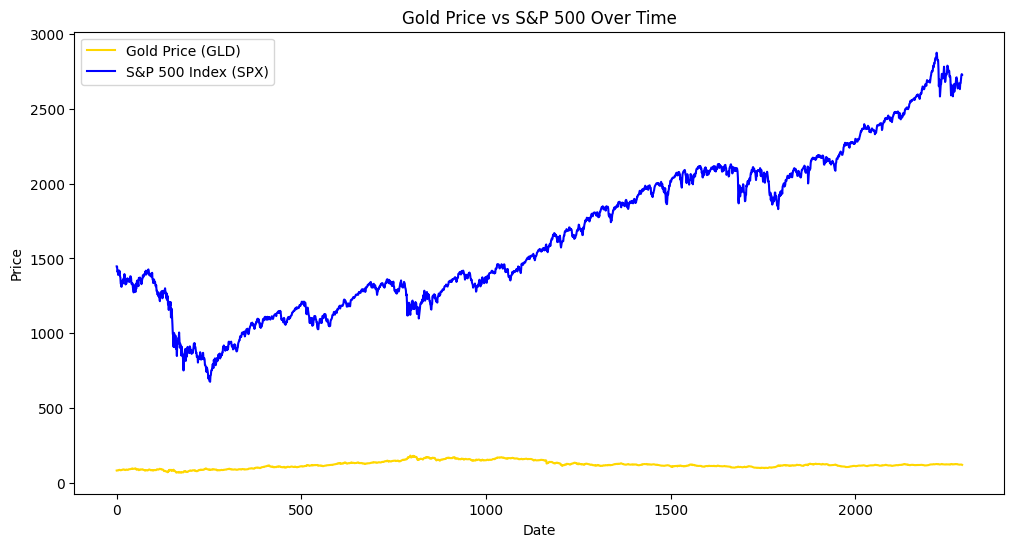

In [ ]:
# Line Plot for Trends

plt.figure(figsize=(12,6))
plt.plot(gold_data.index, gold_data["GLD"], label="Gold Price (GLD)", color="gold")
plt.plot(gold_data.index, gold_data["SPX"], label="S&P 500 Index (SPX)", color="blue")
plt.legend()
plt.title("Gold Price vs S&P 500 Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

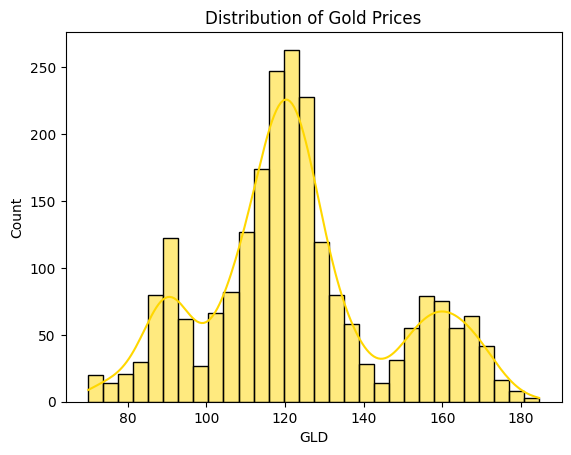

In [ ]:
# Distribution Plot of GLD Prices

sns.histplot(gold_data["GLD"], kde=True, bins=30, color="gold")
plt.title("Distribution of Gold Prices")
plt.show()

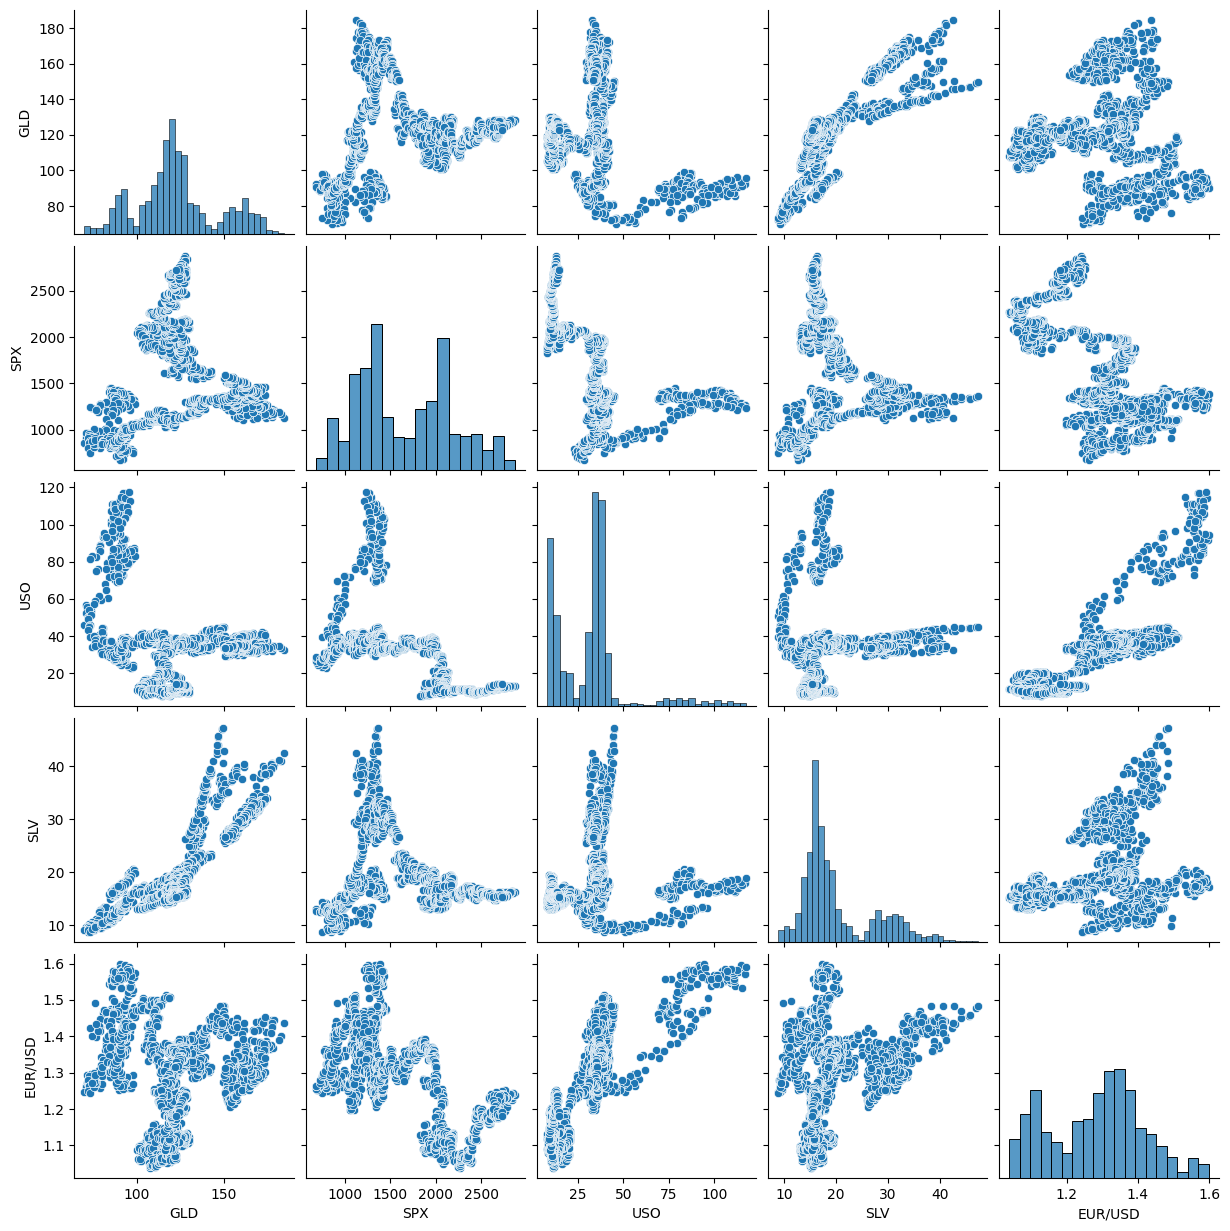

In [ ]:
#PairPlot

sns.pairplot(gold_data[['GLD', 'SPX', 'USO', 'SLV', 'EUR/USD']])

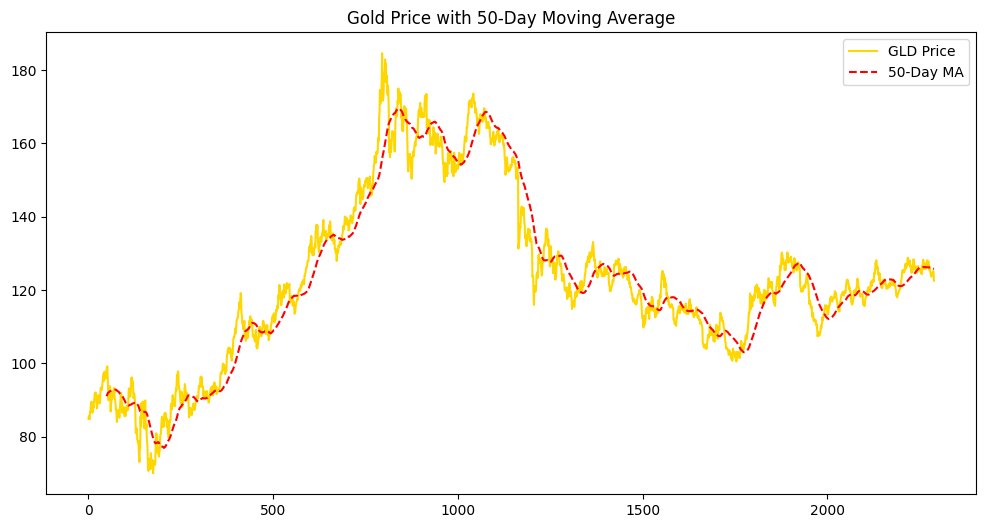

In [ ]:
# Moving Average for Trend Analysis

gold_data["GLD_MA_50"] = gold_data["GLD"].rolling(window=50).mean()  # 50-day moving average

plt.figure(figsize=(12,6))
plt.plot(gold_data.index, gold_data["GLD"], label="GLD Price", color="gold")
plt.plot(gold_data.index, gold_data["GLD_MA_50"], label="50-Day MA", color="red", linestyle="dashed")
plt.legend()
plt.title("Gold Price with 50-Day Moving Average")
plt.show()

In [ ]:
# Calculating Gold’s Annual Volatility

annual_volatility = gold_data["GLD"].pct_change().std() * np.sqrt(252)
print("Annual Volatility of Gold:", annual_volatility)

Annual Volatility of Gold: 0.20526650216811976


<Axes: ylabel='None'>

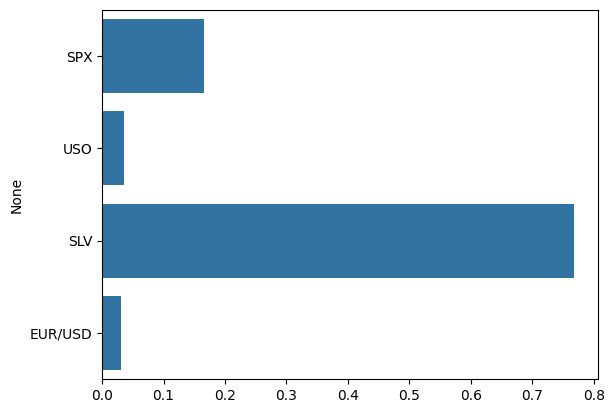

In [ ]:
# Bar Chart of Feature Importances (after model training)
# For Random Forest or XGBoost:

importances = regressor.feature_importances_ # Access feature importances from the trained regressor
features = X_train.columns
sns.barplot(x=importances, y=features)

In [ ]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, Y_train) # Changed y_train to Y_train

DecisionTreeRegressor()

In [ ]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train, Y_train) # Changed y_train to Y_train

GradientBoostingRegressor()

In [ ]:
# Support Vector Regressor (SVR)

from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_train, Y_train) # Changed y_train to Y_train

SVR()

In [ ]:
# XGBoost Regressor

from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, Y_train) # Changed y_train to Y_train

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train) # Changed y_train to Y_train

LinearRegression()

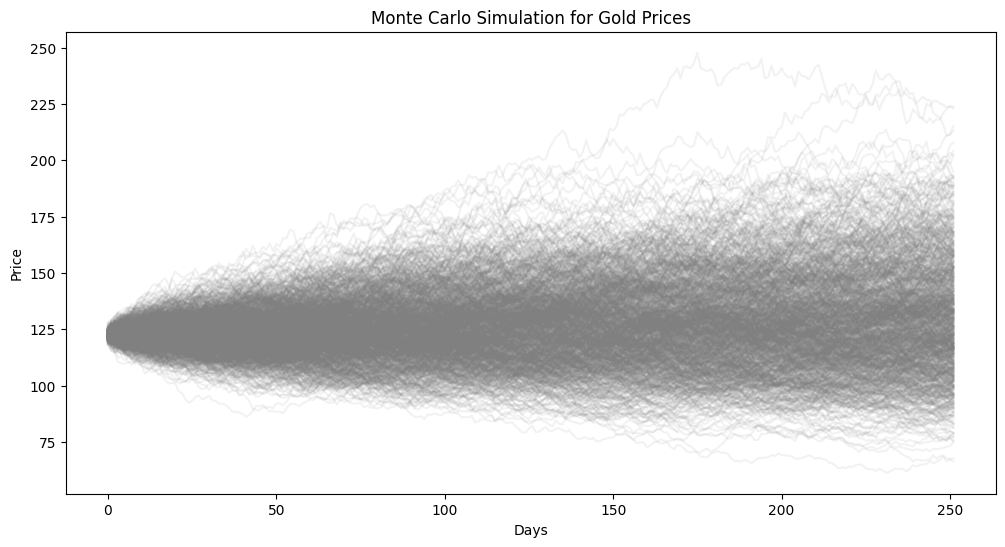

In [ ]:
# Monte Carlo Simulation (Risk Analysis)
# Monte Carlo simulations can predict future price movements.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate daily returns
gold_data["GLD_Daily_Return"] = gold_data["GLD"].pct_change() * 100
num_simulations = 1000
num_days = 252  # One trading year
last_price = gold_data["GLD"].iloc[-1]

# Simulating 1000 future price paths
simulations = np.zeros((num_simulations, num_days))

for i in range(num_simulations):
    price_series = [last_price]
    for j in range(num_days):
        daily_return = np.random.normal(gold_data["GLD_Daily_Return"].mean(), gold_data["GLD_Daily_Return"].std())
        price_series.append(price_series[-1] * (1 + daily_return/100))
    simulations[i] = price_series[1:]

# Plot Monte Carlo Simulations
plt.figure(figsize=(12,6))
plt.plot(simulations.T, color="gray", alpha=0.1)
plt.title("Monte Carlo Simulation for Gold Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

In [ ]:
# Value at Risk (VaR) Calculation

confidence_level = 0.05  # 95% Confidence Interval
VaR_95 = gold_data["GLD_Daily_Return"].quantile(confidence_level)
print(f"Value at Risk (95% confidence): {VaR_95}%")

Value at Risk (95% confidence): -1.9179881693009193%


In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib  # or use pickle
from sklearn.ensemble import RandomForestRegressor

# Create and train your model here if it doesn't exist:
# Assuming 'X_train', 'Y_train' are available from previous cells
model = RandomForestRegressor(n_estimators=100)  # Or your desired model
model.fit(X_train, Y_train)

# Save the model for future use (optional but recommended)
joblib.dump(model, "gold_model.pkl")

# Now you can load it:
model = joblib.load("gold_model.pkl")

# Set Streamlit page configuration
st.set_page_config(page_title="Gold Price Predictor", layout="centered")

# App Title
st.title("🪙 Gold Price Prediction App")
st.markdown("Enter the financial indicators to predict the Gold Price (GLD).")

# Sidebar inputs
st.sidebar.header("📊 Input Features")

spx = st.sidebar.number_input("S&P 500 Index (SPX)", min_value=0.0, step=0.1)
uso = st.sidebar.number_input("Crude Oil Price (USO)", min_value=0.0, step=0.1)
slv = st.sidebar.number_input("Silver Price (SLV)", min_value=0.0, step=0.1)
eur_usd = st.sidebar.number_input("EUR/USD Exchange Rate", min_value=0.0, step=0.001)

# Make prediction
if st.sidebar.button("Predict Gold Price"):
    features = np.array([[spx, uso, slv, eur_usd]])
    prediction = model.predict(features)[0]
    st.success(f"Predicted Gold Price (GLD): **${prediction:.2f}**")

# Optional - Show example input
st.markdown("---")
st.subheader("💡 Example Input")
st.code("""
SPX = 1200.45
USO = 45.32
SLV = 17.23
EUR/USD = 1.134
""")


2025-04-19 16:59:09.226 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 16:59:09.230 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 16:59:09.418 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-19 16:59:09.422 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 16:59:09.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 16:59:09.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 16:59:09.432 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

In [ ]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [ ]:
code = """
import streamlit as st
import numpy as np
import joblib

# Load the model (make sure 'gold_model.pkl' is uploaded to Colab)
model = joblib.load('gold_model.pkl')

st.title("🪙 Gold Price Prediction App")
st.markdown("Enter the financial indicators to predict the Gold Price (GLD).")

spx = st.number_input("S&P 500 Index (SPX)", min_value=0.0, step=0.1)
uso = st.number_input("Crude Oil Price (USO)", min_value=0.0, step=0.1)
slv = st.number_input("Silver Price (SLV)", min_value=0.0, step=0.1)
eur_usd = st.number_input("EUR/USD Exchange Rate", min_value=0.0, step=0.001)

if st.button("Predict Gold Price"):
    features = np.array([[spx, uso, slv, eur_usd]])
    prediction = model.predict(features)[0]
    st.success(f"Predicted Gold Price (GLD): **${prediction:.2f}**")
"""
with open('app.py', 'w') as f:
    f.write(code)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gld_price_data.csv to gld_price_data (2).csv


In [ ]:
!pip install pyngrok # Install the pyngrok library




ERROR:pyngrok.process.ngrok:t=2025-04-19T17:11:10+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-04-19T17:11:10+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-04-19T17:11:10+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [ ]:
!ngrok authtoken <YOUR_AUTHTOKEN>
from pyngrok import ngrok

# Kill any existing tunnels
ngrok.kill()

# Set up tunnel
public_url = ngrok.connect(port=8501)
print(f"Streamlit app running at: {public_url}")

# Start Streamlit app
!streamlit run app.py &> /dev/null &

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `ngrok authtoken <YOUR_AUTHTOKEN>'


ERROR:pyngrok.process.ngrok:t=2025-04-19T17:15:56+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-04-19T17:15:56+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-04-19T17:15:56+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.